# __Logistic Regression__

### Load the Data
---

### Importing Libraries
---

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

### Importing Data
---

In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/Written_Tests.csv")
data.head()

,Test 1,Test 2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [26]:
data.shape

(100, 3)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Test 1   100 non-null    float64
 1   Test 2   100 non-null    float64
 2   Results  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


#### Independent & Dependent Parameter
---

In [28]:
scores = data[['Test 1', 'Test 2']].values     # Independent Feature 
results = data['Results'].values               # Dependent Feature

In [29]:
scores

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [30]:
results

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

### Visualize the Data
---

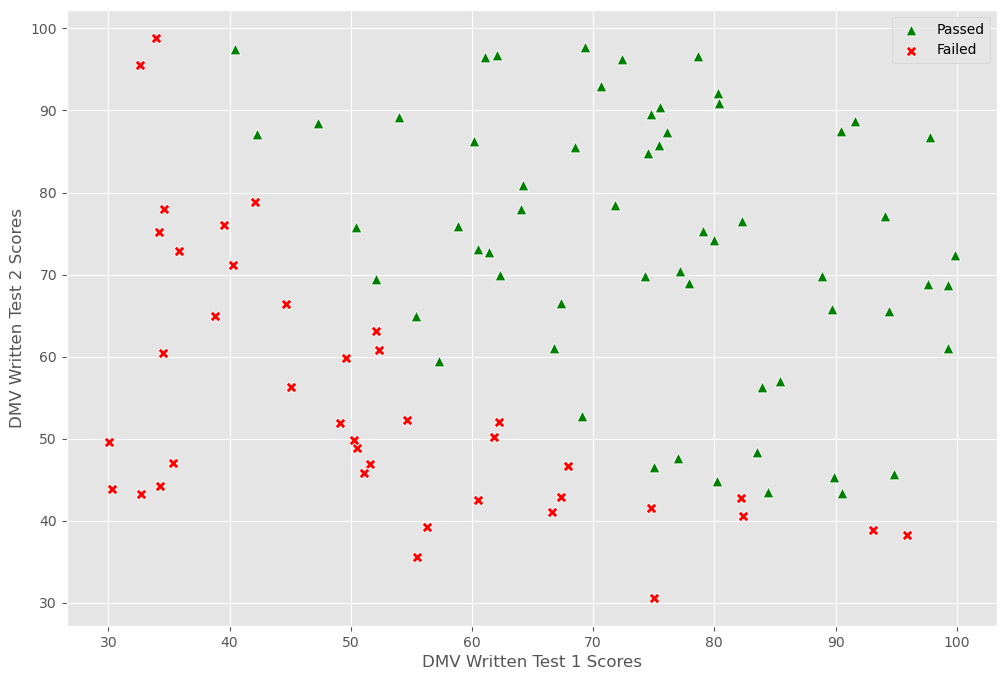

In [31]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show();

Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [32]:
def logistic_function(x):    
    return 1/ (1 + np.exp(-x))

In [33]:
logistic_function(10)

0.9999546021312976

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [34]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

### Task 6: Cost and Gradient at Initialization
---

#### find mean & Standard devation of features values

In [35]:
mean_scores = np.mean(scores, axis=0)   # Axis = 0 means along the axisl
std_scores = np.std(scores, axis=0)

#### standardization of Data

In [36]:
scores = (scores - mean_scores) / std_scores
scores

array([[-1.60224763,  0.63834112],
       [-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ],
       [ 0.69152826,  0.49337794],
       [-1.06199728, -0.5357394 ],
       [-0.23437234,  1.63818413],
       [ 0.4845113 , -1.06373024],
       [ 0.53998666,  1.14651105],
       [ 0.97044832, -1.22709853],
       [ 1.56075461, -1.51418452],
       [ 0.48393864, -1.92641626],
       [ 0.86065022,  0.55490359],
       [ 0.1921582 ,  1.70347834],
       [-1.34839922,  0.53082781],
       [-0.60293429,  1.24314792],
       [ 0.17694982, -0.72913975],
       [ 0.11893077, -1.05699346],
       [ 0.25914553,  1.44433023],
       [ 0.58543944, -1.00845873],
       [ 0.0892403 , -1.26468472],
       [ 1.2413042 , -0.02285779],
       [-0.78042096, -0.93923898],
       [-1.62350714, -1.19053019],
       [ 0.63426559,  0.14875155],
       [-0.17423248,  0.20186768],
       [ 0.75131151, -1.15742514],
       [ 1.41886056, -1.4830648 ],
       [-0.19700066,

In [37]:
rows = scores.shape[0]
cols = scores.shape[1]

In [38]:
X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

In [39]:
theta_init = np.zeros((cols + 1, 1))

In [40]:
theta_init.shape

(3, 1)

In [41]:

cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


#### logistic regression function

In [1]:
# Assuming you have obtained the coefficients theta
beta_0 = gradient[0]
beta_1 = gradient[1]
beta_2 = gradient[2]

print(f"Logistic Regression Function: P(y=1|x) = 1 / (1 + exp(-({beta_0} + {beta_1}*Test1 + {beta_2}*Test2)))")


NameError: name 'gradient' is not defined

## $$ \sigma(z) = \frac{1}{1+e^{-({1.50850586} + {3.5468762}*Test1 + {3.29383709}*Test2))}}$$

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [44]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [45]:
theta, costs = gradient_descent(X, y, theta_init, 1, 100)

In [46]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.27738106]
 [3.06129133]
 [2.82508236]]
Resulting cost: 0.21043453277383303


In [47]:
# Assuming you have obtained the coefficients theta
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]

# Print the logistic regression function
print(f"Logistic Regression Function: P(y=1|x) = 1 / (1 + exp(-({beta_0} + {beta_1}*Test1 + {beta_2}*Test2)))")


Logistic Regression Function: P(y=1|x) = 1 / (1 + exp(-([1.27738106] + [3.06129133]*Test1 + [2.82508236]*Test2)))


## $$ \sigma(z) = \frac{1}{1+e^{-({1.50850586} + {3.5468762}*Test1 + {3.29383709}*Test2))}}$$

### Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

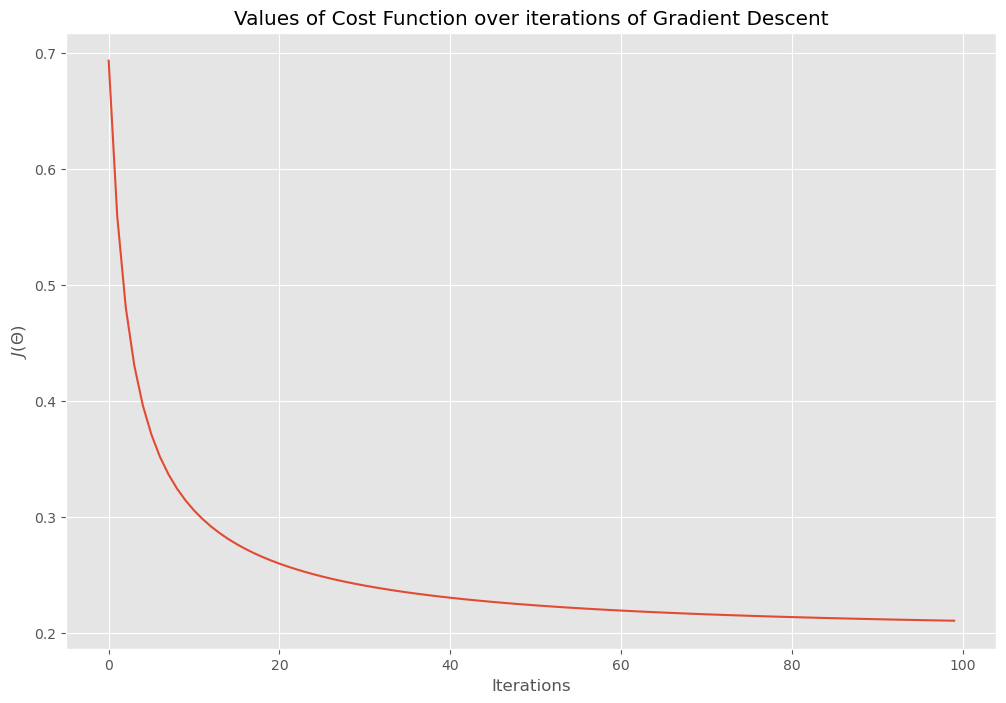

In [48]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

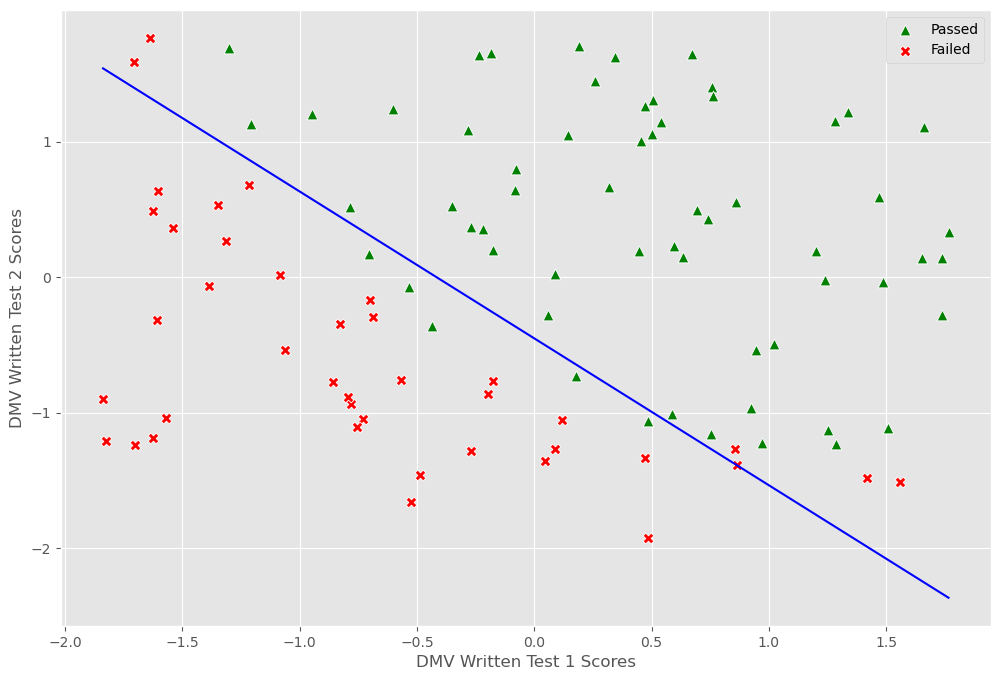

In [49]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

### Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [50]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [51]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


#### Predict the new  Value

In [52]:
def predict_data(t1,t2):
    test = np.array([t1,t2])
    test = (test - mean_scores)/std_scores
    test = np.append(np.ones(1), test)
    probability = logistic_function(test.dot(theta))
    return np.round(probability[0], 2)

In [56]:
test_1 = float(input("Enter the score of test 1: "))
test_2 = float(input("Enter the score of test 2: "))
probability = predict_data(test_1, test_2)
print(f"A person who scores {test_1} and {test_2} on their written test 1 & test 2 have a {probability} probability of passing.")


Enter the score of test 1:  50
Enter the score of test 2:  87


A person who scores 50.0 and 87.0 on their written test 1 & test 2 have a 0.88 probability of passing.
